<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/Stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset/TSLA.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
1,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
3,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
4,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500


In [ ]:
x=df.iloc[:,[1,2,4,5]].values

In [ ]:
x.shape

(2579, 4)

In [ ]:
y=df.iloc[:,3].values

In [ ]:
x_train=x[:2000]

In [ ]:
print(x_train.shape)

(2000, 4)


In [ ]:
x_test=x[2000:]

In [ ]:
print(x_test.shape)

(579, 4)


In [ ]:
y_train=y[:2000]

In [ ]:
y_train.shape

(2000,)

In [ ]:
y_test=y[2000:]
print(y_test.shape)

(579,)


In [ ]:
df.info

<bound method DataFrame.info of             Date        Open        High         Low       Close   Adj Close  \
0     2010-06-30    5.158000    6.084000    4.660000    4.766000    4.766000   
1     2010-07-01    5.000000    5.184000    4.054000    4.392000    4.392000   
2     2010-07-02    4.600000    4.620000    3.742000    3.840000    3.840000   
3     2010-07-06    4.000000    4.000000    3.166000    3.222000    3.222000   
4     2010-07-07    3.280000    3.326000    2.996000    3.160000    3.160000   
...          ...         ...         ...         ...         ...         ...   
2574  2020-09-21  453.130005  455.679993  407.070007  449.390015  449.390015   
2575  2020-09-22  429.600006  437.760010  417.600006  424.230011  424.230011   
2576  2020-09-23  405.160004  412.149994  375.880005  380.359985  380.359985   
2577  2020-09-24  363.799988  399.500000  351.299988  387.790009  387.790009   
2578  2020-09-25  393.470001  408.730011  391.299988  407.339996  407.339996   

       

In [ ]:
u=np.mean(x,axis=0)

In [ ]:
std=np.std(x,axis=0)

In [ ]:
x_train=(x_train-u)/std

In [ ]:
x_test=(x_test-u)/std

In [ ]:
a=np.mean(y,axis=0)
b=np.std(y,axis=0)

In [ ]:
y_train=(y_train-a)/b
y_test=(y_test-a)/b

In [ ]:
def hypothesis(x, theta):
    return np.dot(x, theta)

In [ ]:
def cost(X, Y, theta):
    m = X.shape[0]
    total_error = 0

    y_p = hypothesis(X, theta)
    total_error = np.sum((y_p - Y)**2)

    return total_error/m

In [ ]:
def gradient(X, Y, theta):

    y_p = hypothesis(X, theta)

    grad = np.dot(X.T, (y_p - Y))

    return grad/X.shape[0]

In [ ]:
def gradient_descent(X, Y, learning_rate = 0.01, max_steps = 1000):

    m, n = X.shape
    theta = np.zeros((n, ))
    cost_epoch = []

    for i in range(max_steps):

        grad = gradient(X, Y, theta)

        e = cost(X, Y, theta)
        cost_epoch.append(e)

        theta = theta - learning_rate*grad

    return theta, cost_epoch

In [ ]:
theta, cost_epoch = gradient_descent(x_train, y_train)

In [ ]:
theta

array([0.25610884, 0.25228365, 0.25528416, 0.25528416])

In [ ]:
cost_epoch

[0.23926809796403947,
 0.23488193186274314,
 0.230576204297267,
 0.2263494400936294,
 0.22220019113127862,
 0.2181270358469557,
 0.2141285787476565,
 0.21020344993252588,
 0.20635030462351903,
 0.20256782270467102,
 0.19885470826981502,
 0.19520968917859563,
 0.19163151662062383,
 0.18811896468762587,
 0.1846708299534373,
 0.18128593106170113,
 0.17796310832112586,
 0.17470122330816681,
 0.1714991584769941,
 0.16835581677661288,
 0.1652701212750056,
 0.16224101479016748,
 0.1592674595279078,
 0.1563484367262941,
 0.15348294630661696,
 0.15067000653075535,
 0.14790865366482633,
 0.14519794164900238,
 0.1425369417733844,
 0.139924742359819,
 0.1373604484495507,
 0.1348431814966025,
 0.13237207906677964,
 0.12994629454219309,
 0.12756499683120226,
 0.1252273700836768,
 0.12293261341148007,
 0.12067994061407943,
 0.1184685799091878,
 0.11629777366834546,
 0.114166778157351,
 0.11207486328145243,
 0.11002131233521131,
 0.1080054217569544,
 0.10602650088772796,
 0.10408387173467304,
 0.10217

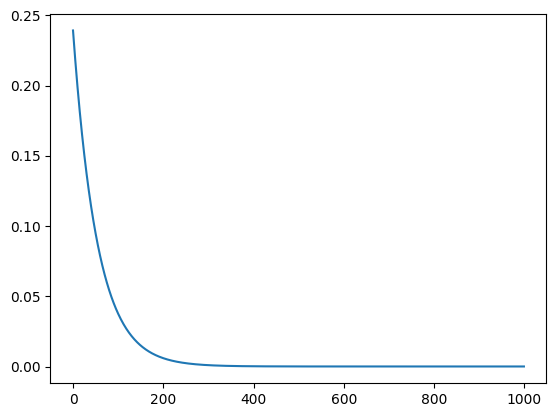

In [ ]:
plt.plot(cost_epoch)

In [ ]:
y_pred_test=[]
for i in range(x_test.shape[0]):
    pred=hypothesis(x_test[i],theta)
    y_pred_test.append(pred)
y_pred_test=np.array(y_pred_test)

In [ ]:
for i in range(len(y_pred_test)):
    print(y_pred_test[i],y_test[i])

0.28853307288601354 0.2941697009259504
0.34402103258141836 0.34968391319794023
0.34278306003995873 0.3561307470127132
0.3760688671788406 0.38048540279123894
0.38733986999117437 0.3971396772175292
0.4186013728696776 0.40877979730961245
0.39196573737455687 0.37923185525377634
0.3979266263877448 0.399825886327736
0.3771207989784353 0.37930345072598737
0.33171591352473295 0.3281945984727247
0.3000724127112617 0.3120775228897032
0.3253952530093359 0.30598893505331515
0.34380403006922977 0.35505633141835397
0.3618325758346416 0.37873043623879116
0.35103351661095505 0.365478683801258
0.3523483500623215 0.320494217120489
0.2575506237235834 0.24828986105481568
0.2234020434552504 0.20004617077664358
0.2131993764753694 0.2207476666902077
0.24174774925140952 0.24223698141542324
0.26754137870491135 0.28235053842987357
0.24878971295660746 0.26755867748781376
0.25090154299641687 0.25932109729230934
0.24644827949039885 0.24671393690636145
0.22388992770872368 0.23596927954375368
0.25152259502721186 0.2

In [ ]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print('Accuracy',metrics.explained_variance_score(y_test,y_pred_test))

MAE 0.03333784946725671
MSE 0.006475864182810801
RMSE 0.08047275428870818
Accuracy 0.997624537079711
